# Predicting House Prices In King County

## Business Problem

## Objectives

## Data Preparation

We're going to use pandas, matplotlib and numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need 

# Regular EDA (Exploratory Data Analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear iniside the notebook
%matplotlib inline

# Models form Scikit-Learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("../data/kc_house_data.csv")
df.shape # How many (rows, columns)

(21597, 21)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How an you add, change or remove features to get more out of your data?

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# Checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Dropping columns that don't majorly determine price or we have no info about
dropped_df = df.drop(["id", "date", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated",
                           "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"], axis=1)
dropped_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900.0,3,1.00,1180,5650,1.0,NaN
1,538000.0,3,2.25,2570,7242,2.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0


In [8]:
# Remove all missing values
dropped_df.dropna(inplace=True)

In [9]:
# Checking for missing values
dropped_df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
dtype: int64

In [10]:
dropped_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
1,538000.0,3,2.25,2570,7242,2.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0
5,1230000.0,4,4.50,5420,101930,1.0,0.0


We can see above in the bathroom columns that there are some values that have decimal points. A house cannot have `2.25` or `4.50` bathrooms. That is logically incorrect. We can fix this by rounding off all the values in the column.

In [11]:
# Roudning off the values in the bathroom column
dropped_df["bathrooms"] = dropped_df.bathrooms.round()
dropped_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
1,538000.0,3,2.0,2570,7242,2.0,0.0
2,180000.0,2,1.0,770,10000,1.0,0.0
3,604000.0,4,3.0,1960,5000,1.0,0.0
4,510000.0,3,2.0,1680,8080,1.0,0.0
5,1230000.0,4,4.0,5420,101930,1.0,0.0


In [12]:
# Make a correlation matrix
dropped_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
price,1.000000,0.309651,0.521331,0.704652,0.087005,0.258277,0.276295
bedrooms,0.309651,1.000000,0.488816,0.578211,0.029407,0.182396,-0.002386
bathrooms,0.521331,0.488816,1.000000,0.702812,0.089076,0.371802,0.068439
sqft_living,0.704652,0.578211,0.702812,1.000000,0.173345,0.357184,0.110230
sqft_lot,0.087005,0.029407,0.089076,0.173345,1.000000,-0.007246,0.023143
floors,0.258277,0.182396,0.371802,0.357184,-0.007246,1.000000,0.021883
waterfront,0.276295,-0.002386,0.068439,0.110230,0.023143,0.021883,1.000000


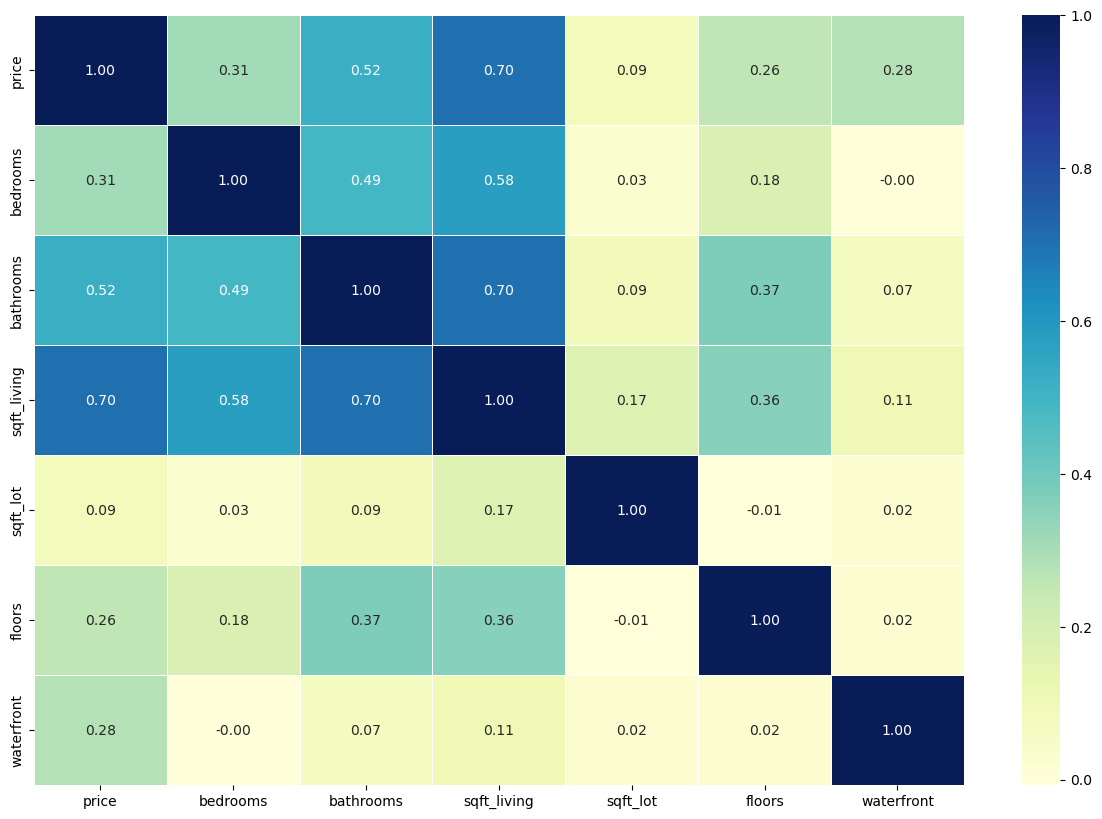

In [13]:
# Let's make our correlation matrix a little prettier
corr_matrix = dropped_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modelling

In [14]:
dropped_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
1,538000.0,3,2.0,2570,7242,2.0,0.0
2,180000.0,2,1.0,770,10000,1.0,0.0
3,604000.0,4,3.0,1960,5000,1.0,0.0
4,510000.0,3,2.0,1680,8080,1.0,0.0
5,1230000.0,4,4.0,5420,101930,1.0,0.0


In [15]:
# Split the data into X and y
X = dropped_df.drop("price", axis=1)
y = dropped_df["price"]

In [16]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
1,3,2.0,2570,7242,2.0,0.0
2,2,1.0,770,10000,1.0,0.0
3,4,3.0,1960,5000,1.0,0.0
4,3,2.0,1680,8080,1.0,0.0
5,4,4.0,5420,101930,1.0,0.0
...,...,...,...,...,...,...
21591,3,2.0,1310,1294,2.0,0.0
21592,3,2.0,1530,1131,3.0,0.0
21593,4,2.0,2310,5813,2.0,0.0
21594,2,1.0,1020,1350,2.0,0.0


In [17]:
y

1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 19221, dtype: float64

In [18]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [19]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
19117,4,3.0,3140,9085,1.0,0.0
5526,4,2.0,1800,8385,1.0,0.0
18105,4,2.0,2220,12385,1.0,0.0
10163,3,1.0,1864,6978,1.0,0.0
4686,4,2.0,1780,4169,2.0,0.0
...,...,...,...,...,...,...
12685,3,1.0,1190,9083,1.0,0.0
13442,6,2.0,1810,4838,1.5,0.0
6091,3,1.0,1110,7000,1.5,0.0
973,4,3.0,2790,10819,2.0,0.0


In [20]:
y_train, len(y_train)

(19117    920000.0
 5526     377000.0
 18105    456000.0
 10163    235000.0
 4686     540000.0
            ...   
 12685    230000.0
 13442    230000.0
 6091     302000.0
 973      765000.0
 17738    799000.0
 Name: price, Length: 15376, dtype: float64,
 15376)

Now we've got our data split into training and test sets, it's time to build a machine learning model. We'll train it (find the patterns) on the training set and we'll test it (use the patterns) on the test set.


In [23]:
# Instaniciate the model
regressor = LinearRegression()

# Set random seed
np.random.seed(42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Evaluate the model
score = regressor.score(X_test, y_test)
score

0.5183155492957581

## Hyperparameter tuning with RandomizedSearchCV



In [22]:
# Get what parameters there are to tune the model
model.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}